In [25]:

#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
# Load the data
df = pd.read_csv('C:/Users/carlos.isaacf/Desktop/DS_PORTFOLIO/Online_Retail.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Preprocesamiento y Verificación de la calidad de los datos
Nos aseguramos de que no haya valores nulos que puedan interferir con nuestro análisis.

In [27]:
# Verificar si hay valores nulos
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [28]:
# Eliminando las filas con valores nulos en la columna 'Description'
df = df.dropna(subset=['Description'])

# Verificando que se hayan eliminado correctamente los valores nulos
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [29]:
# Revisar el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  int64  
 7   Country      540455 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 37.1+ MB


In [30]:
# Convertir 'InvoiceDate' a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Comprobar el tipo de datos de 'InvoiceDate' después de la conversión
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

## Exploración inicial de los datos

In [31]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,540455,540455,540455,540455.000000,540455,540455.000000,540455.000000,540455
unique,24446,3958,4223,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,NaN,494024
mean,NaN,NaN,NaN,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.519829,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:49:00,1.250000,14364.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-20 11:38:00,2.080000,15287.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:49:00,4.130000,16261.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


## Investigación de valores negativos

Podemos notar que las columnas `Quantity` y `UnitPrice` tienen valores negativos.

Vamos a explorar las filas con valores negativos en `Quantity` y en `UnitPrice` para entender mejor estos datos.


In [32]:
# Investigando los valores negativos en la columna 'Quantity'
negative_quantity = df[df['Quantity'] < 0]
negative_quantity


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


### Investigación de valores negativos en 'UnitPrice'

Hemos identificado que las filas con `Quantity` negativa parecen representar devoluciones o cancelaciones de pedidos reflejandose en la primera letra de `InvoiceNo`. Ahora vamos a comprobar si estas filas también tienen un `UnitPrice` negativo, lo que podría sugerir alguna relación entre estos dos fenómenos.


In [33]:
# Investigando si las filas con 'Quantity' negativa también tienen 'UnitPrice' negativo
negative_quantity[negative_quantity['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [34]:
# Investigando los valores negativos en la columna 'UnitPrice'
negative_price = df[df['UnitPrice'] < 0]
negative_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


No existía relación entre los datos negativos de `Quantity` con los de `UnitPrice`, pero si nos fijamos en la descripción de las filas con `UnitPrice` negativo, podemos darnos cuenta de que se debe a un ajuste de deuda, reflejado por la letra A en `InvoiceNo`.

## Distribución de 'Quantity' y 'UnitPrice'

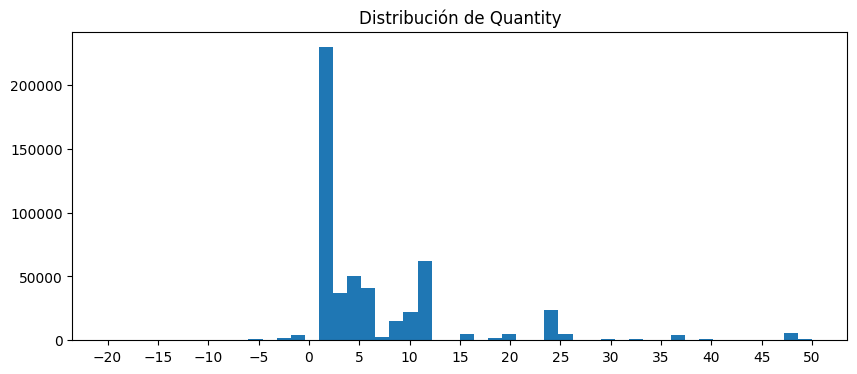

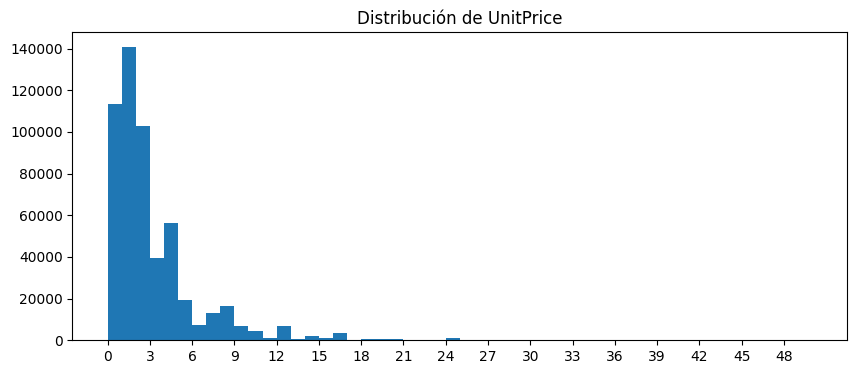

In [35]:
# Histograma de 'Quantity'
plt.figure(figsize=(10,4))
plt.hist(df['Quantity'], bins=50, range=(-20,50))
plt.xticks(range(-20, 51, 5))  # this line sets the x-axis ticks
plt.title('Distribución de Quantity')
plt.show()

# Histograma de 'UnitPrice'
plt.figure(figsize=(10,4))
plt.hist(df['UnitPrice'], bins=50, range=(0,50))
plt.xticks(range(0, 51, 3))  # this line sets the x-axis ticks
plt.title('Distribución de UnitPrice')
plt.show()


## **Insights de los histogramas**:

- Podemos ver que la gran mayoria de las ventas se generan por 1 unidad.
- En cuanto al precio la mayoría de productos vendidos ocilan entre 1 y 3 Libras esterlinas

## Transacciones por país

Ahora vamos a explorar la cantidad de transacciones por país. Esto nos dará una idea de los mercados más grandes para la tienda online. Entender la distribución geográfica de las transacciones nos ayudará a identificar los mercados más grandes.

In [36]:
# Conteo de transacciones por país
country_counts = df['Country'].value_counts()
country_counts.head(20).to_frame()

,count
Country,
United Kingdom,494024
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


## Visualización del Top 10 de países por número de transacciones

Para facilitar la interpretación de los datos, vamos a visualizar solo el top 10 de países por número de transacciones en un gráfico de barras.


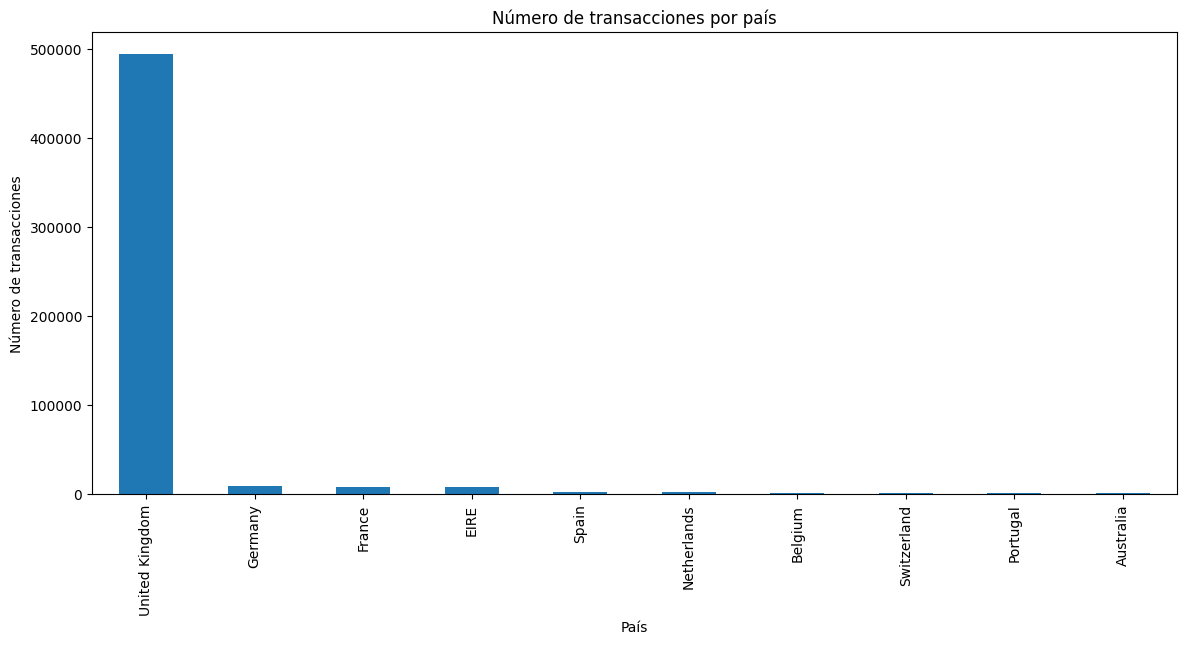

In [37]:
# Gráfico de barras de transacciones por país
plt.figure(figsize=(14,6))
country_counts.head(10).plot(kind='bar')
plt.title('Número de transacciones por país')
plt.xlabel('País')
plt.ylabel('Número de transacciones')
plt.show()

Las ventas están ubicadas fuertemente en United Kingdome con presencia tambien en  Alemania, Francia e Irlanda.
Existen ventas en varios otros países pero no alcanzan a ser significativas.

## Creando una columna de ventas totales

Para poder analizar las ventas a lo largo del tiempo, necesitamos crear una nueva columna que represente el total de ventas de cada transacción.haremos esto multiplicando la `Quantity` por el `UnitPrice` para cada fila.

In [38]:
# Creando una columna de ventas totales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Tendencia de ventas en el tiempo

In [39]:
# Extrayendo el mes de la fecha de la factura
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Agrupando las ventas por mes
monthly_sales = df.groupby('InvoiceMonth')['TotalSales'].sum()

monthly_sales.to_frame()


,TotalSales
InvoiceMonth,
2010-12,748957.020
2011-01,560000.260
2011-02,498062.650
2011-03,683267.080
2011-04,493207.121
2011-05,723333.510
2011-06,691123.120
2011-07,681300.111
2011-08,682680.510


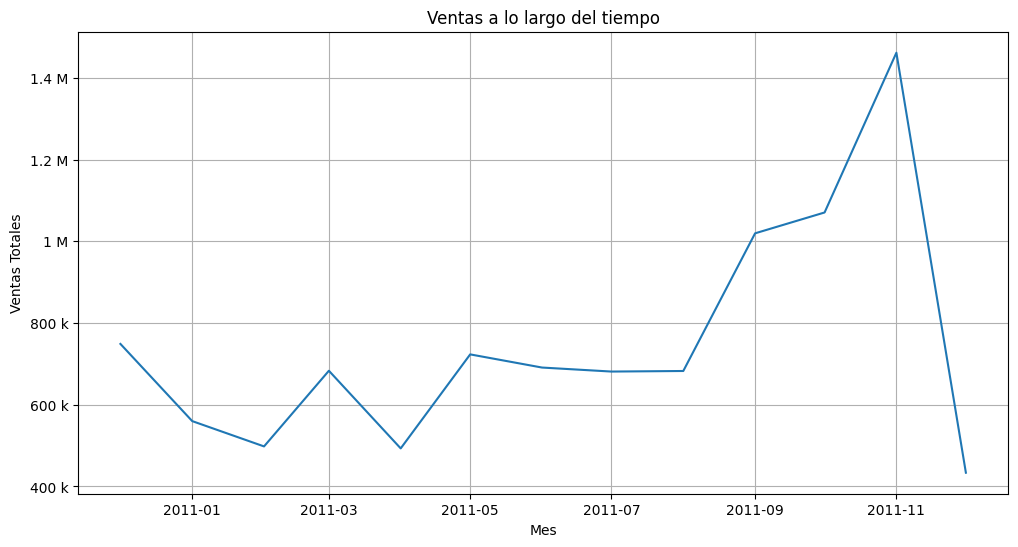

In [40]:
import matplotlib.ticker as ticker

# Convirtiendo 'InvoiceMonth' a formato datetime
monthly_sales.index = monthly_sales.index.to_timestamp()


# Plot de las ventas en el tiempo
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_sales, ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()



## 10 Productos más vendidos

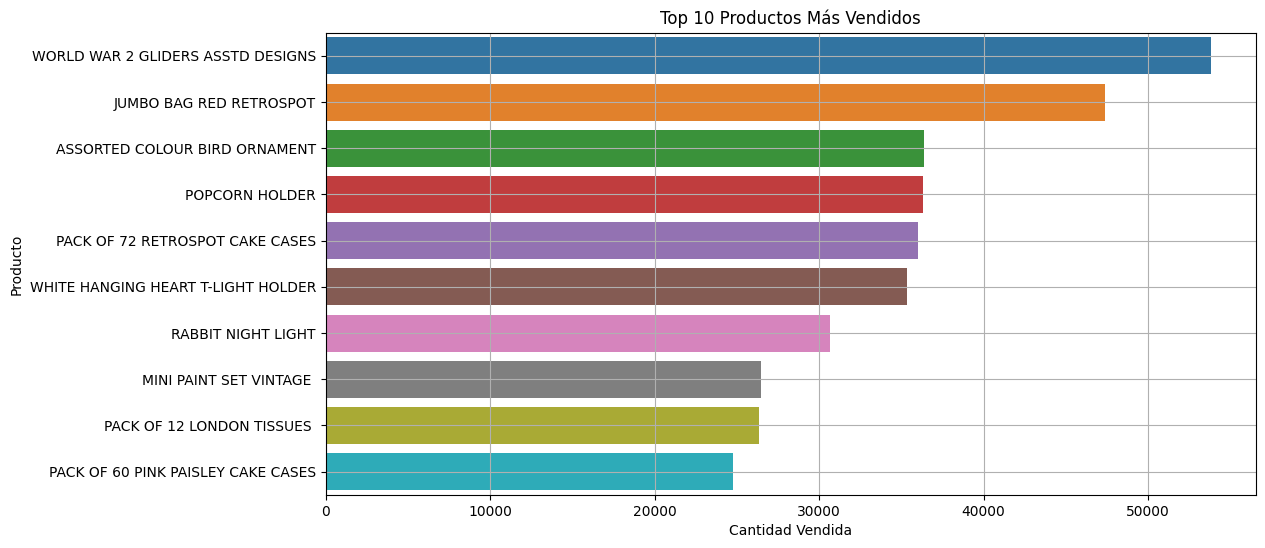

In [41]:
# agrupando los datos por 'Description' y sumando 'Quantity' para encontrar la cantidad total vendida por producto
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Top 10 Productos Más Vendidos
top_10_products = top_products.head(10)

# Plot de top 10 productos
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_products.index, x=top_10_products.values, orient='h')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.grid(True)
plt.show()

In [42]:
product_sales = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
product_sales.to_frame()

,TotalSales
Description,
DOTCOM POSTAGE,206245.48
REGENCY CAKESTAND 3 TIER,164762.19
WHITE HANGING HEART T-LIGHT HOLDER,99668.47
PARTY BUNTING,98302.98
JUMBO BAG RED RETROSPOT,92356.03
RABBIT NIGHT LIGHT,66756.59
POSTAGE,66230.64
PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
ASSORTED COLOUR BIRD ORNAMENT,58959.73


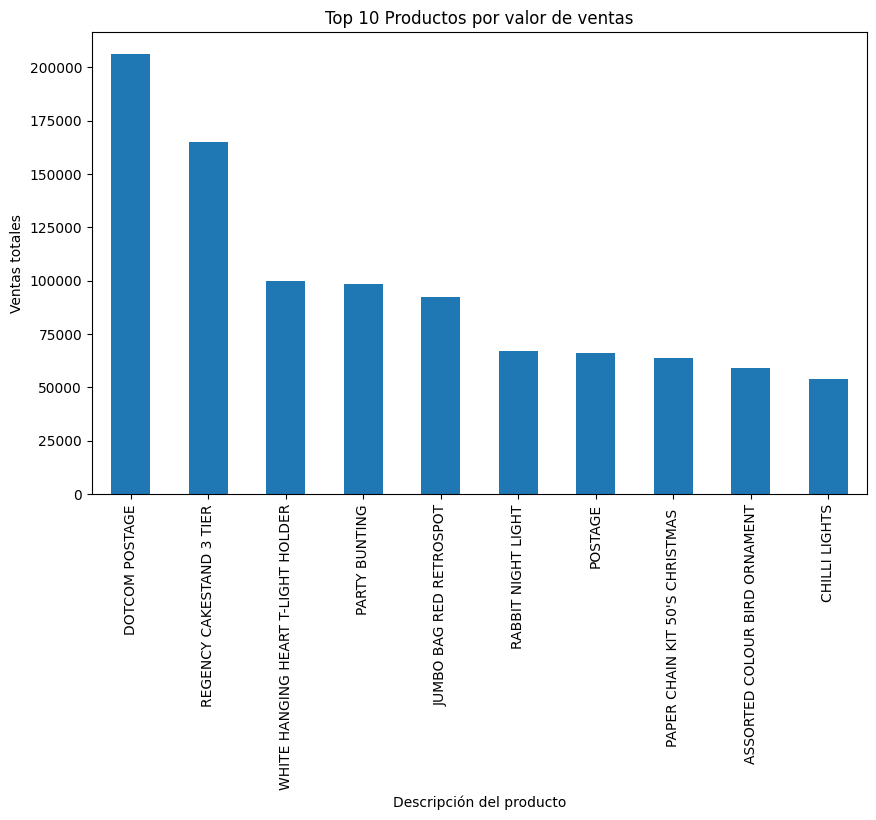

In [43]:
top_10_products = product_sales.head(10)

plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Productos por valor de ventas')
plt.ylabel('Ventas totales')
plt.xlabel('Descripción del producto')
plt.show()

## Top 10 Clientes

In [44]:
top_10_customers = df['CustomerID'].value_counts().head(10)
top_10_customers

CustomerID
15287    133647
17841      7983
14911      5903
14096      5128
12748      4642
14606      2782
15311      2491
14646      2085
13089      1857
13263      1677
Name: count, dtype: int64

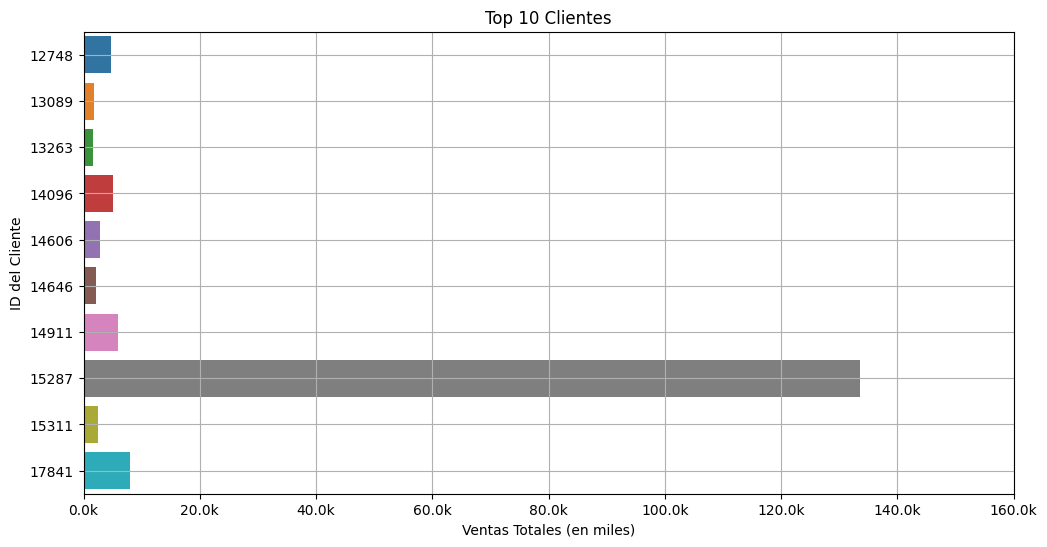

In [45]:
# Plot de los 10 principales clientes
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_customers.index, x=top_10_customers.values, orient='h')

# Obtener las marcas actuales del eje x
ubicaciones_marcas = plt.xticks()[0]

# Configurar las etiquetas de las marcas del eje x como decenas de miles
plt.xticks(ubicaciones_marcas, ['{:0.1f}k'.format(x/1e3) for x in ubicaciones_marcas])

plt.title('Top 10 Clientes')
plt.xlabel('Ventas Totales (en miles)')
plt.ylabel('ID del Cliente')
plt.grid(True)
plt.show()


## Clientes por N° de Transacciones

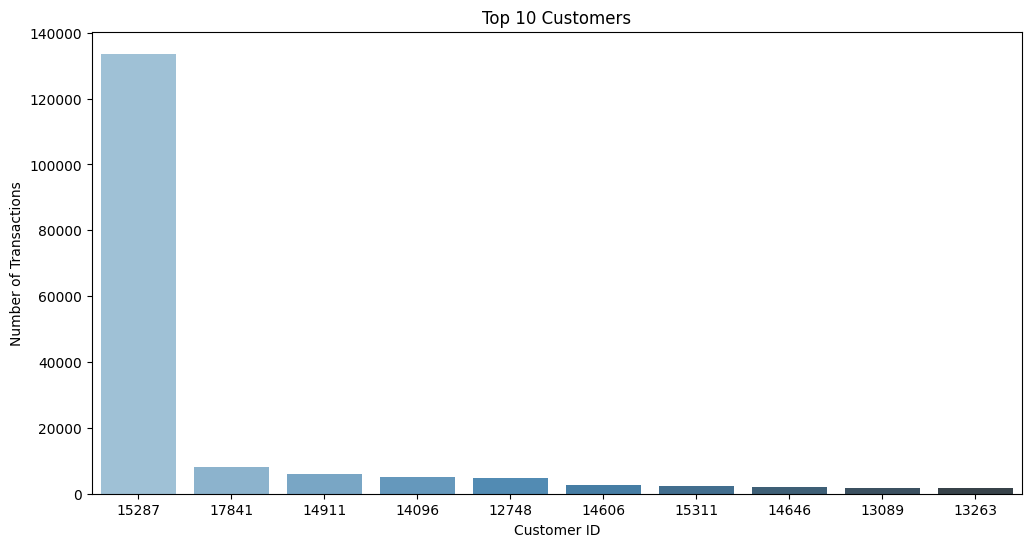

In [52]:
# Get the top 10 customers
top_10_customers_by_transactions = df['CustomerID'].value_counts().head(10).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_customers_by_transactions.index, y=top_10_customers_by_transactions.values, palette="Blues_d", order=top_10_customers_by_transactions.index)
plt.title('Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.show()


Cliente `15287` es por lejos el que más compra con un valor cercano a $1.400.000 y una cantidad de **133.647**

In [47]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales
count,540455.000000,540455,540455.000000,540455.000000,540455.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.519829,18.036188
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-28 11:49:00,1.250000,14364.000000,3.480000
50%,3.000000,2011-07-20 11:38:00,2.080000,15287.000000,9.840000
75%,10.000000,2011-10-19 11:49:00,4.130000,16261.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,218.007598,NaN,96.889628,1486.741928,379.318894


# `INSIGHTS` hasta el momento:

### Clientes más valiosos:
El cliente con ID 15287 es significativamente más activo que cualquier otro cliente, con 133647 transacciones. Identificar a los clientes más valiosos puede ayudar a la empresa a enfocar sus esfuerzos de marketing y servicio al cliente.

### Productos más vendidos:
Los productos más vendidos son "WHITE HANGING HEART T-LIGHT HOLDER", "REGENCY CAKESTAND 3 TIER" y "JUMBO BAG RED RETROSPOT". Este insight puede ayudar a la empresa a entender qué productos son más populares entre sus clientes y a gestionar su inventario en consecuencia.

### Productos que generan más ingresos:
Los productos que generan más ingresos son "DOTCOM POSTAGE", "REGENCY CAKESTAND 3 TIER", y "WHITE HANGING HEART T-LIGHT HOLDER". Este insight puede ayudar a la empresa a entender qué productos son más rentables.

### Mercados más grandes:
La mayoría de las transacciones provienen del Reino Unido, seguido por Alemania y Francia. Este insight puede ayudar a la empresa a entender sus mercados más grandes y a dirigir sus esfuerzos de marketing y expansión.

### Distribución de las cantidades:
La cantidad promedio de productos por transacción es de aproximadamente 9.60, con una desviación estándar de 218. Hay algunas cantidades negativas que podrían indicar devoluciones.

### Distribución de los precios unitarios:
El precio unitario promedio es de aproximadamente 4.62, con una desviación estándar de 96.89. Hay algunos precios unitarios negativos que podrían ser ajustes de deudas.